In [ ]:
# 查看数据文件目录  list datalab files
!ls datalab/

In [ ]:
# 查看个人永久空间文件  list files in your permanent storage
!ls /home/tianchi/myspace/


In [ ]:
# 查看当前kernel下已安装的包  list packages
!pip list --format=columns

In [ ]:
# 绘图案例 an example of matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn
from IPython.display import display, clear_output
import time
x = np.linspace(0,5)
f, ax = plt.subplots()
ax.set_title("Bessel functions")

for n in range(1,10):
    time.sleep(1)
    ax.plot(x, jn(x,n))
    clear_output(wait=True)
    display(f)

# close the figure at the end, so we don't get a duplicate
# of the last plot
plt.close()

In [1]:
import pandas as np

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [5]:
car_df=pd.read_csv('datalab/231784/used_car_train_20200313.csv',sep=' ')
car_df.isnull().sum().sort_values(ascending=False)

fuelType             8680
gearbox              5981
bodyType             4506
model                   1
v_14                    0
creatDate               0
name                    0
regDate                 0
brand                   0
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
price                   0
v_13                    0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
SaleID                  0
dtype: int64

In [6]:
car_df['notRepairedDamage'].replace('-', np.nan, inplace=True)
drop_list=['SaleID','name','offerType','seller']
car_df.drop(drop_list,axis=1,inplace=True)
car_df.shape

(150000, 27)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


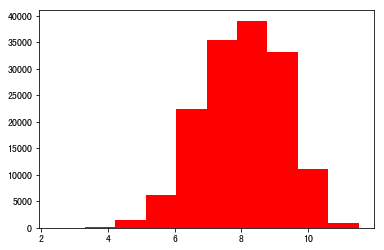

In [7]:
#提取标签,这里使用切片的方法
y_target=car_df.ix[:,'price']
train_x=car_df.ix[:,car_df.columns!='price']
#价格取对数
train_y=np.log(y_target)
plt.hist(train_y, orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

In [8]:
import seaborn as sns
import missingno as msno
import scipy.stats as st

In [9]:
Train_data=pd.read_csv('datalab/231784/used_car_train_20200313.csv',sep=' ')
Test_data=pd.read_csv('datalab/231784/used_car_testA_20200313.csv',sep=' ')

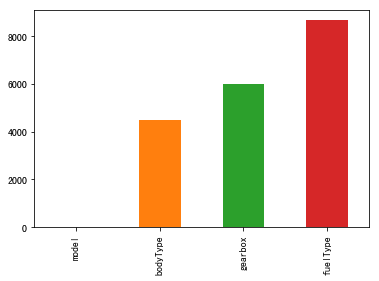

In [10]:
#可视化
missing=Train_data.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()#seriers.plot.bar()

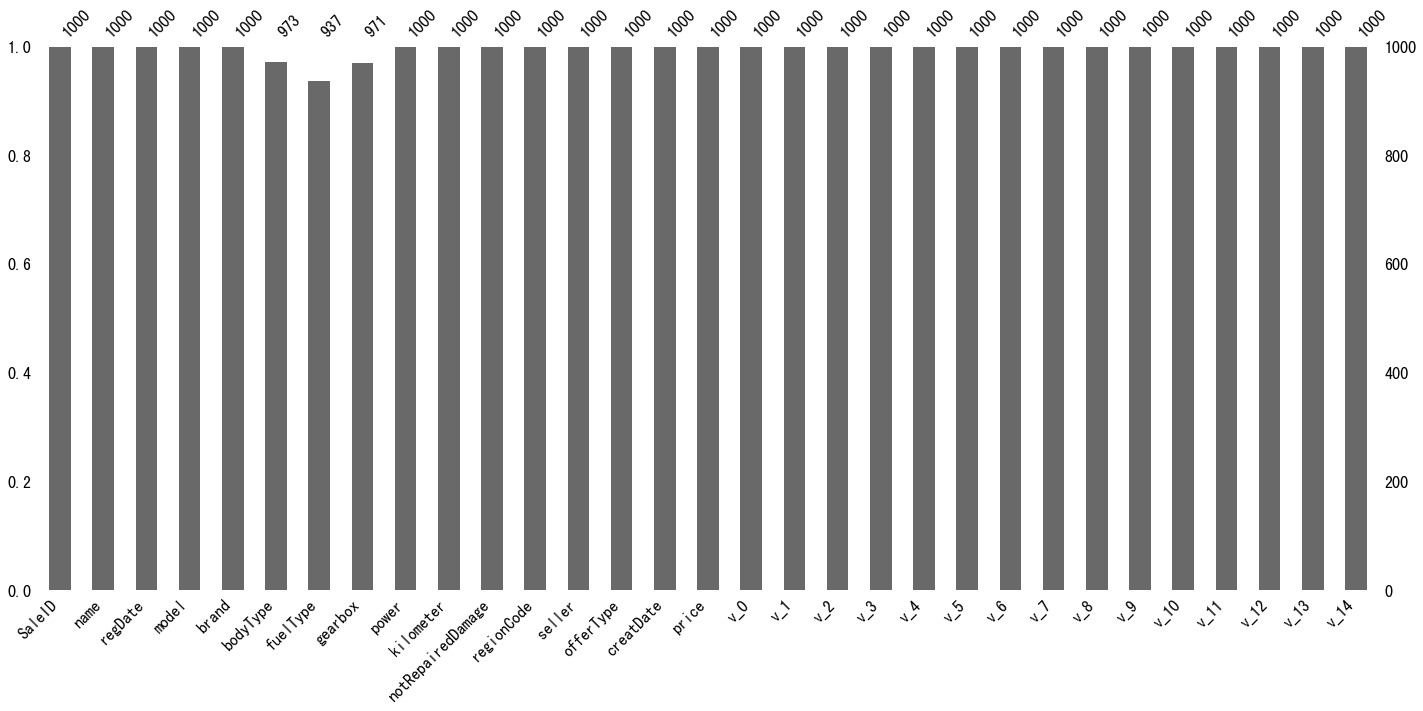

In [11]:
msno.bar(Train_data.sample(1000))

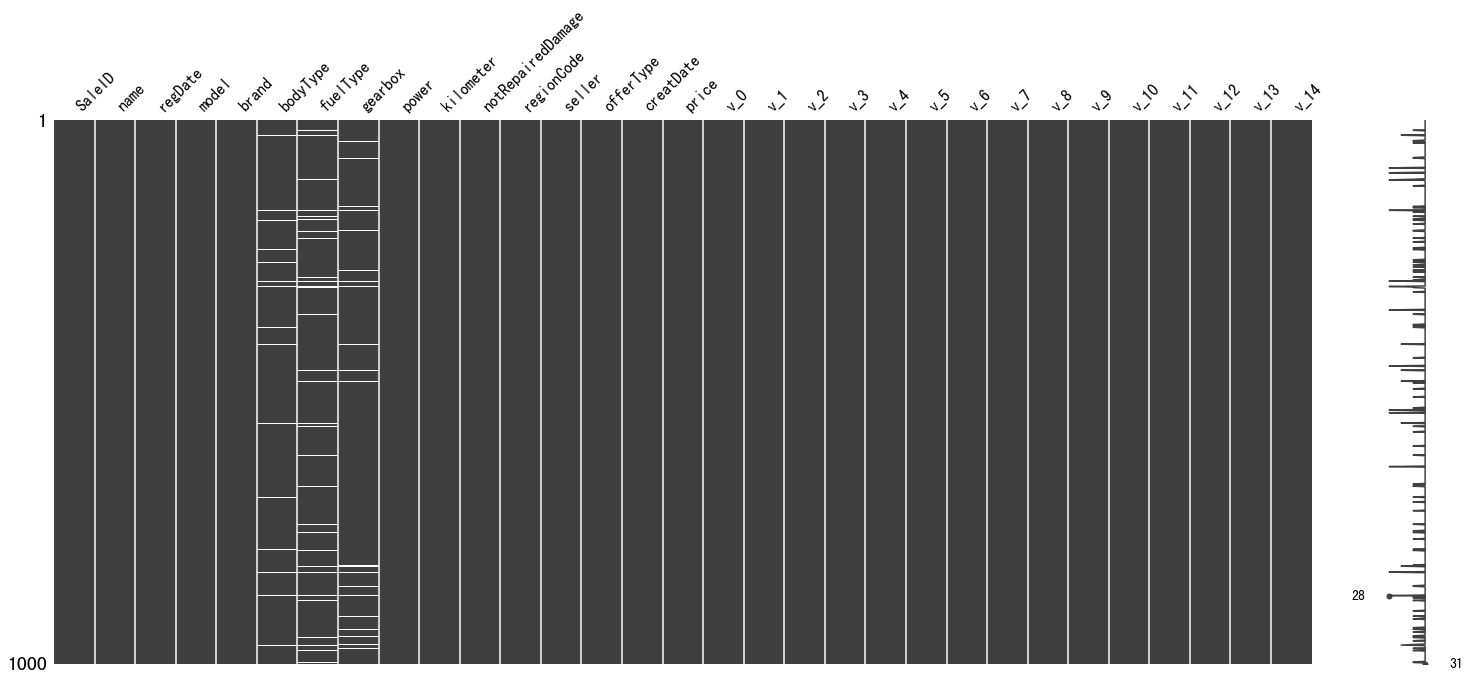

In [12]:
msno.matrix(Train_data.sample(1000))

In [13]:
Train_data['notRepairedDamage'].replace('-',np.nan,inplace=True)
Train_data['notRepairedDamage'].value_counts()

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

In [14]:
del Train_data['seller']
del Train_data['offerType']
del Test_data['seller']
del Test_data['offerType']

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


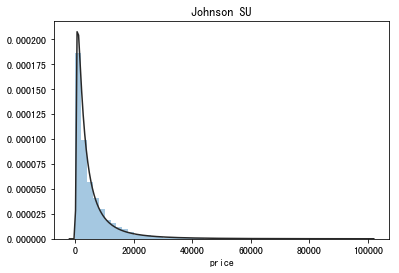

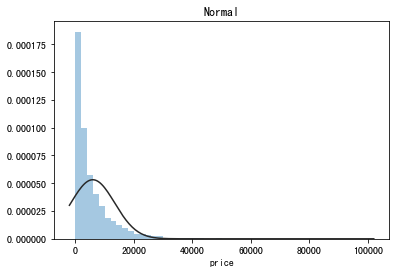

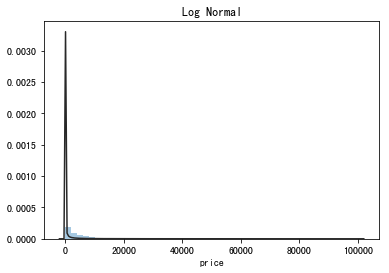

In [15]:
#基本数据处理完，需要查看数据分布
y = Train_data['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64 



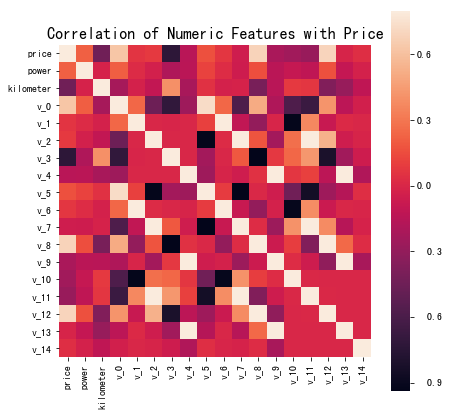

In [16]:
#相关性分析
numeric_features = ['price','power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]
categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode']
price_numeric = Train_data[numeric_features]#原数据表不要动
correlation = price_numeric.corr()
#这个好，将其他特征与目标值的相关系数输出
print(correlation['price'].sort_values(ascending=False),'\n')
f, ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)
del price_numeric['price']

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


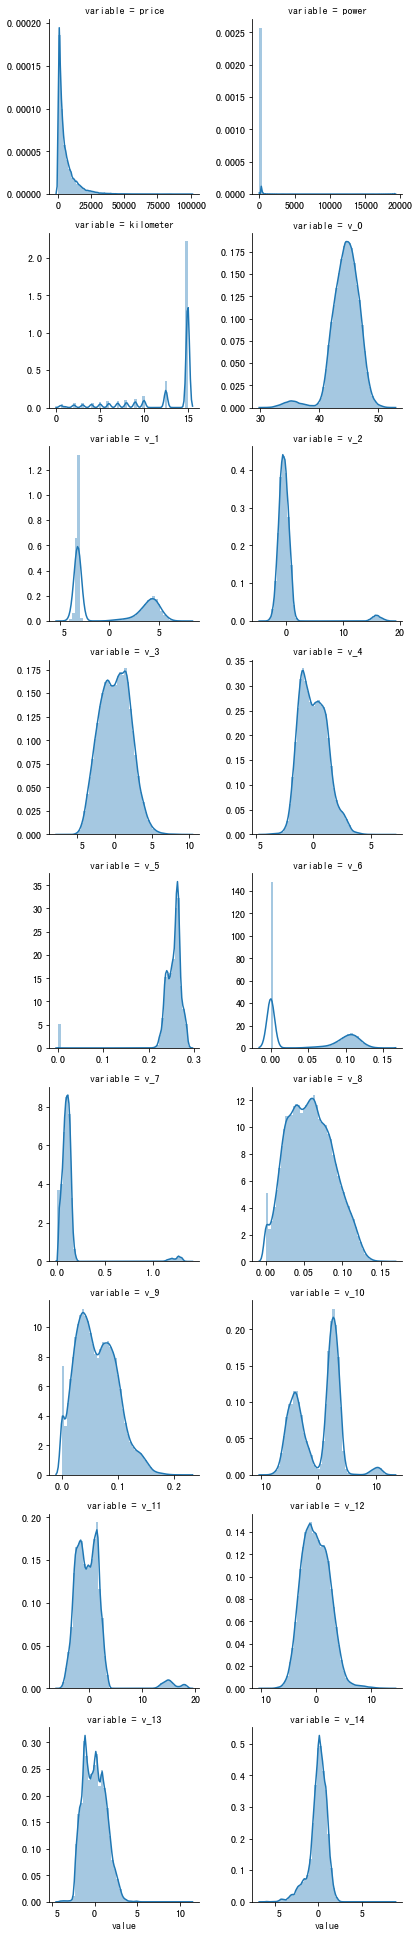

In [17]:
f = pd.melt(Train_data, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

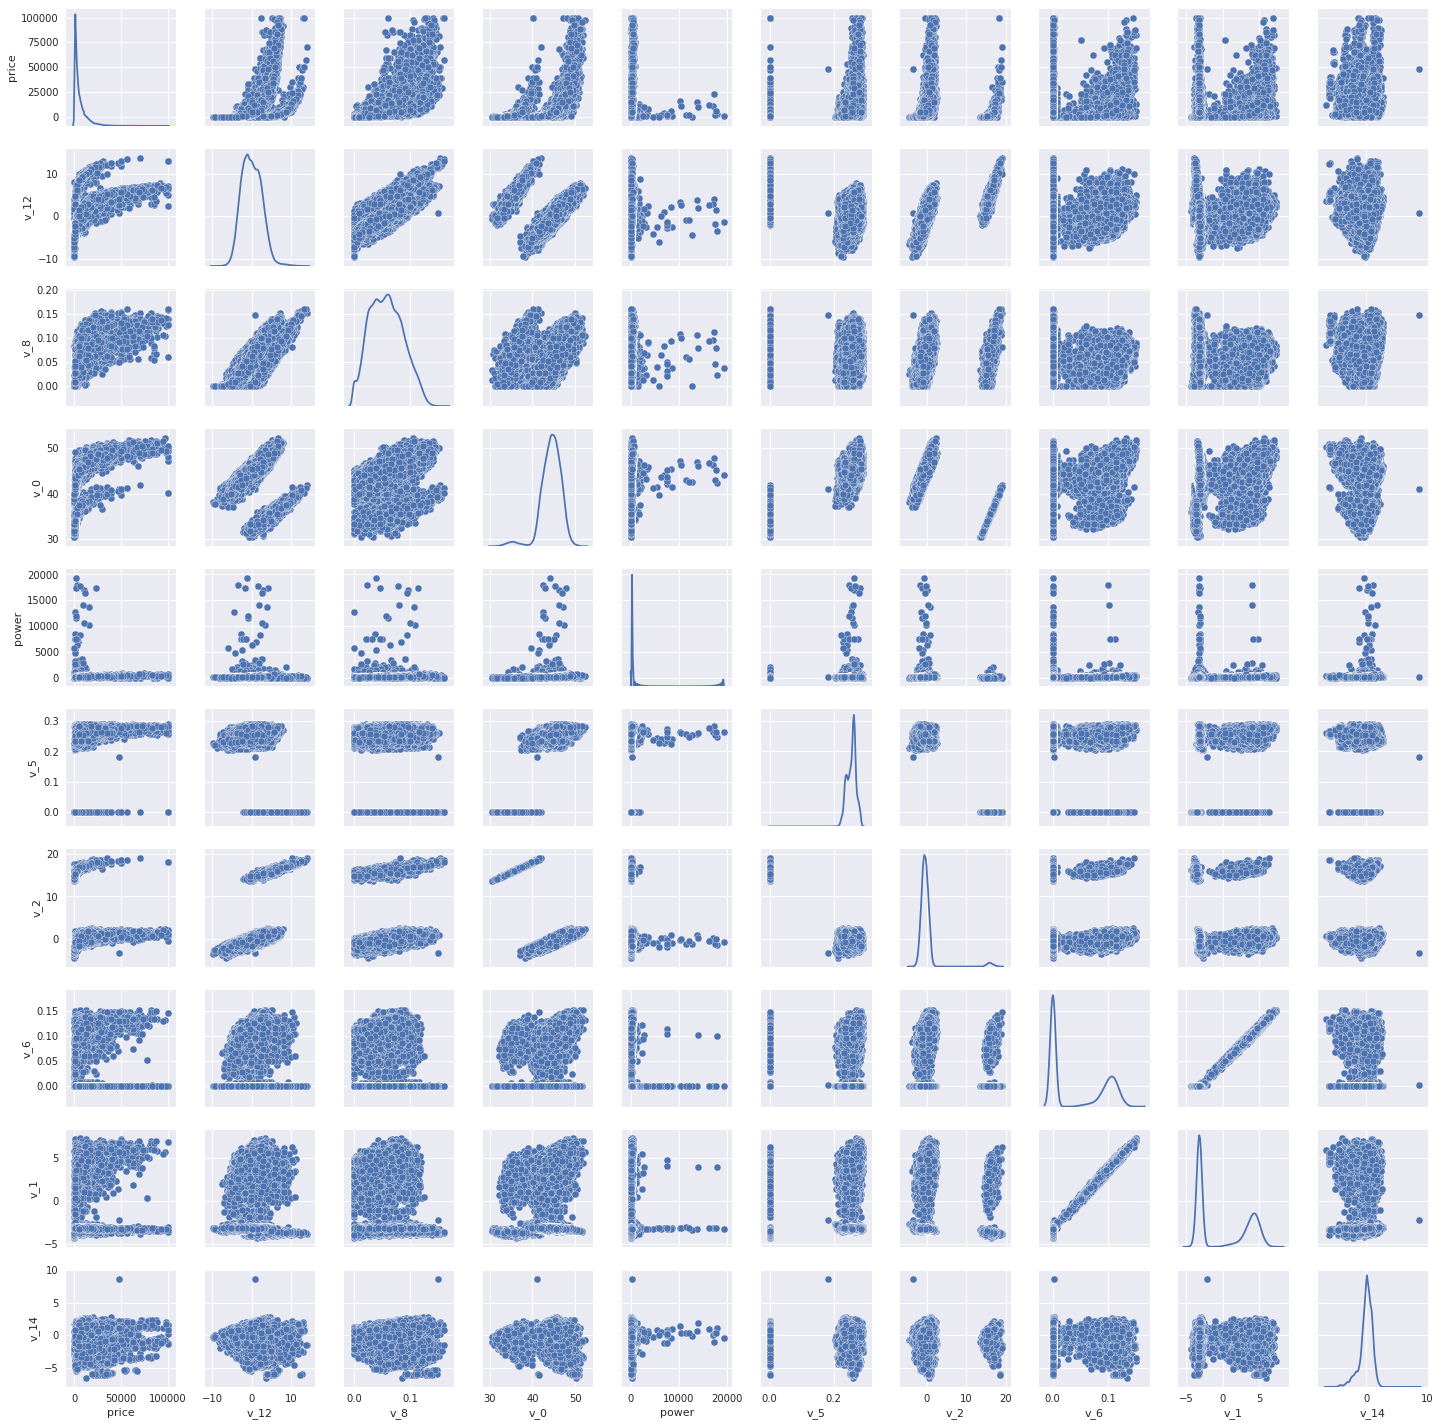

In [18]:
#将与目标数据正相关的数据取出，一起分析数据之间的关系
sns.set()
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(Train_data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

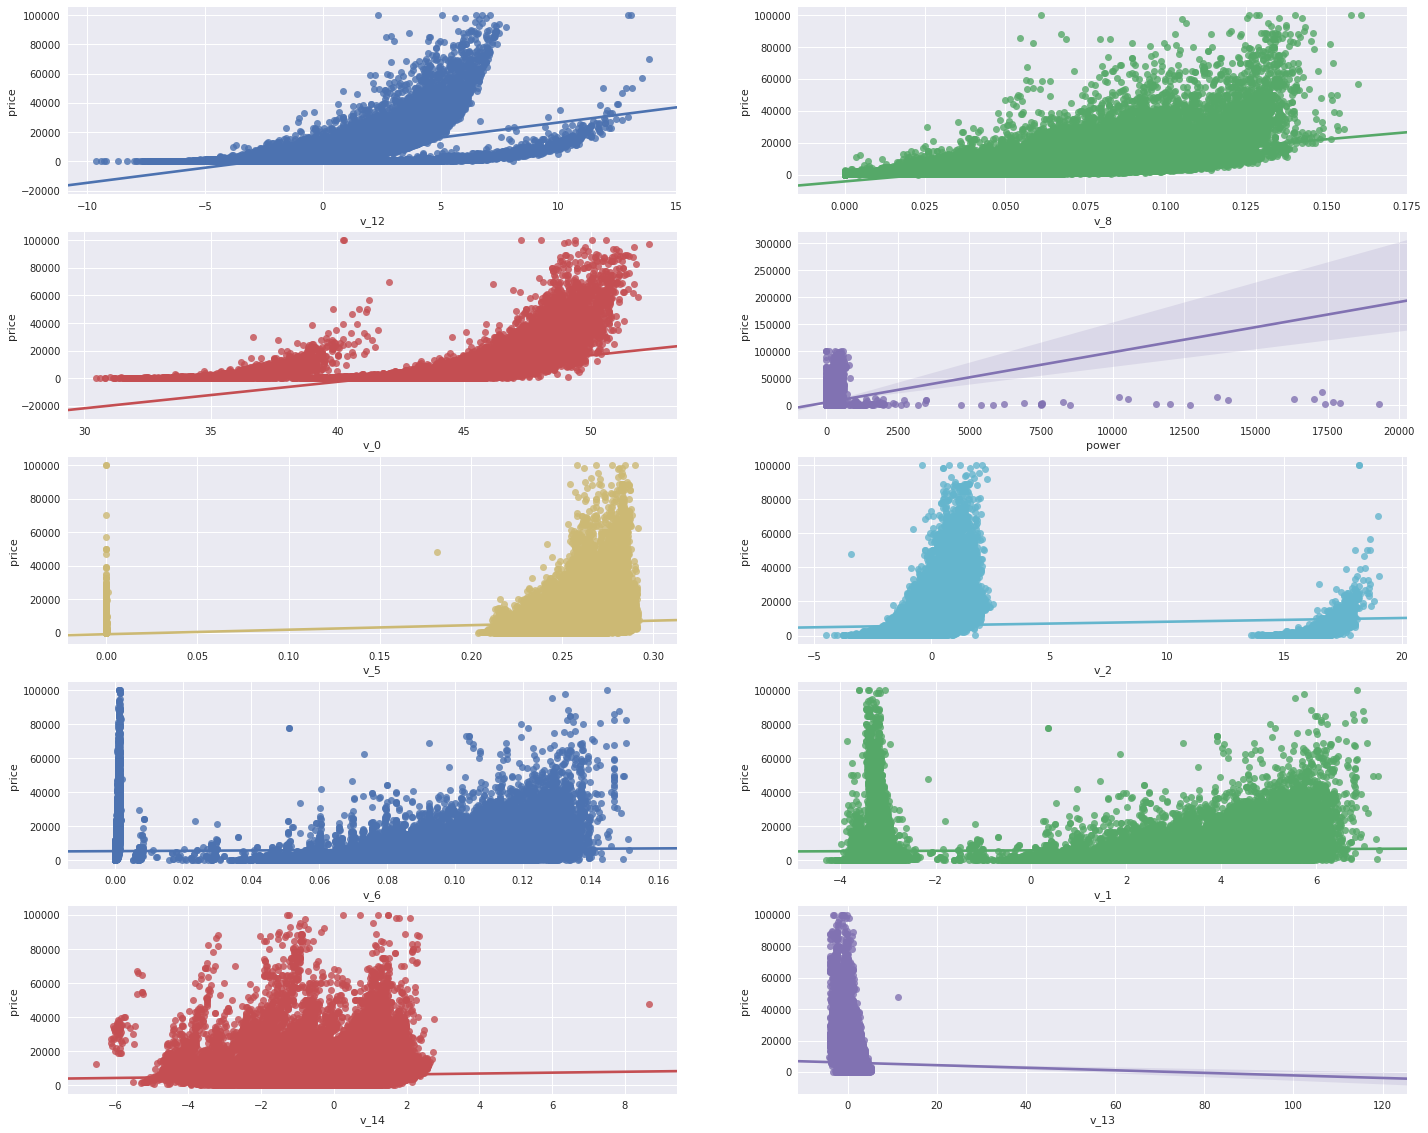

In [19]:
#分析这些变量与目标值的回归关系
Y_train=Train_data['price']
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))
# ['v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
v_12_scatter_plot = pd.concat([Y_train,Train_data['v_12']],axis = 1)
sns.regplot(x='v_12',y = 'price', data = v_12_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

v_8_scatter_plot = pd.concat([Y_train,Train_data['v_8']],axis = 1)
sns.regplot(x='v_8',y = 'price',data = v_8_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

v_0_scatter_plot = pd.concat([Y_train,Train_data['v_0']],axis = 1)
sns.regplot(x='v_0',y = 'price',data = v_0_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

power_scatter_plot = pd.concat([Y_train,Train_data['power']],axis = 1)
sns.regplot(x='power',y = 'price',data = power_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

v_5_scatter_plot = pd.concat([Y_train,Train_data['v_5']],axis = 1)
sns.regplot(x='v_5',y = 'price',data = v_5_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

v_2_scatter_plot = pd.concat([Y_train,Train_data['v_2']],axis = 1)
sns.regplot(x='v_2',y = 'price',data = v_2_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

v_6_scatter_plot = pd.concat([Y_train,Train_data['v_6']],axis = 1)
sns.regplot(x='v_6',y = 'price',data = v_6_scatter_plot,scatter= True, fit_reg=True, ax=ax7)

v_1_scatter_plot = pd.concat([Y_train,Train_data['v_1']],axis = 1)
sns.regplot(x='v_1',y = 'price',data = v_1_scatter_plot,scatter= True, fit_reg=True, ax=ax8)

v_14_scatter_plot = pd.concat([Y_train,Train_data['v_14']],axis = 1)
sns.regplot(x='v_14',y = 'price',data = v_14_scatter_plot,scatter= True, fit_reg=True, ax=ax9)

v_13_scatter_plot = pd.concat([Y_train,Train_data['v_13']],axis = 1)
sns.regplot(x='v_13',y = 'price',data = v_13_scatter_plot,scatter= True, fit_reg=True, ax=ax10)

In [ ]:
#如果有任何缺失值，则添加missing类，并将缺失值用missing代替
for c in categorical_features:
    Train_data[c] = Train_data[c].astype('category')
    if Train_data[c].isnull().any():
        Train_data[c] = Train_data[c].cat.add_categories(['MISSING'])
        Train_data[c] = Train_data[c].fillna('MISSING')
#画出箱图
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data, id_vars=['price'], value_vars=categorical_features)
#g函数不是很懂它的意思
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price")

In [ ]:
import pandas_profiling
pfr = pandas_profiling.ProfileReport(Train_data)
pfr.to_file(".\result\car_EAD")